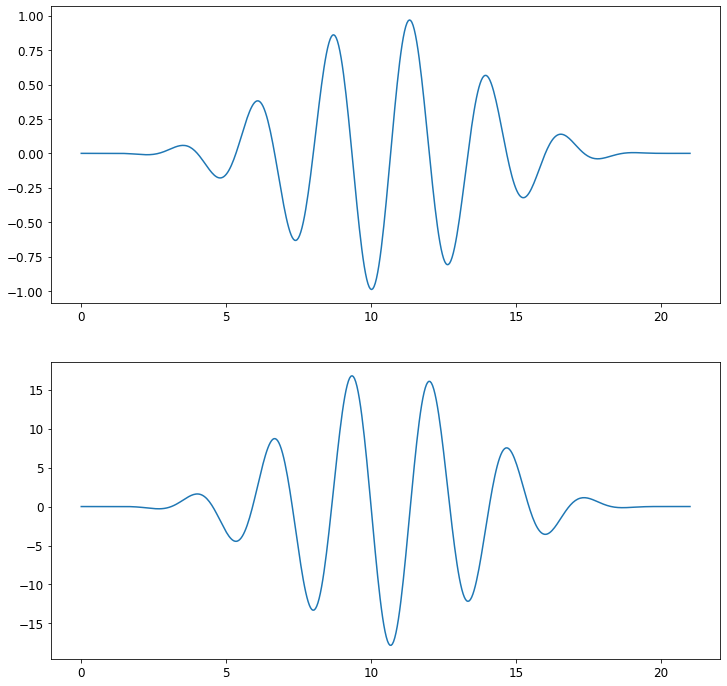

In [1]:
import numpy as np
import math
import sys
from scipy.interpolate import UnivariateSpline

import matplotlib.pyplot as plt
from matplotlib import cm

plt.rcParams.update({'figure.figsize': (12,12)})
plt.rcParams.update({'font.size': 12})
plt.rcParams["mathtext.fontset"] = "cm"

au2Vnm = 5.14220826*10**2
au2fs  = 0.02418884254
au2eV  = 27.2114

F0 = 0.5  / au2Vnm
w  = 1.55 / au2eV
phi0 = -math.pi/2.
tau   = 21. / au2fs

def F(t):
    return np.sin(math.pi * t/tau)**4 * np.cos(w * t + phi0)

tmin = 0.
tmax = 30. / au2fs
Nt   = 1000
tgrid = np.linspace(tmin,tmax,Nt)

tgrid_pulse = np.linspace(0,tau,500)
Fgrid = F(tgrid_pulse)

E_spl = UnivariateSpline(tgrid_pulse,Fgrid,s=0)
A_spl = E_spl.antiderivative()

#E_spl_grid = E_spl(tgrid-t0)
#A_spl_grid = A_spl(tgrid-t0)
#A_spl_grid_masked = mask(tgrid-t0,2.7,-100.,7.)*A_spl_grid

fig, ax = plt.subplots(nrows=2)

ax[0].plot(tgrid_pulse*au2fs,E_spl(tgrid_pulse))
ax[1].plot(tgrid_pulse*au2fs,A_spl(tgrid_pulse))

#ax[0].plot(tgrid_pulse*au2fs,A_spl.derivative()(tgrid_pulse))

plt.show()

#sys.exit()

with open('field.dat','w') as file:
    for it in range(Nt):
        time = tgrid[it]
        
        E = 0.
        A = 0.
        if time <= max(tgrid_pulse):
            A = A_spl(time)
            E = E_spl(time)

        Ax = A   #0.0
        Ay = 0.0 #A
        Ex = E   #0.0
        Ey = 0.0

        file.write("%s %s %s %s %s\n" % (time*au2fs,Ax,Ay,Ex,Ey))